# 1 SDS on AU 100 2x4x4 LAMMPS

In [1]:
## preferred installation method for netcdf on NEMO locally:
# module load mpi/openmpi/2.1-gnu-5.2
# module load {...}
# export CPPFLAGS="${CPPFLAGS} -I${MPI_INC_DIR}"
# export LDFLAGS="${LDFLAGS} -L${MPI_LIB_DIR}"
# pip install --user netCDF4

## alternatively:
# pip install --user --global-option=build_ext --global-option="-L${MPI_INC_DIR}" netCDF4

In [2]:
# recommended for display of 80 char ruler at RHS
# does not work
from notebook.services.config import ConfigManager
ip = get_ipython()
cm = ConfigManager(parent=ip)
cm.update('notebook', {"ruler_column": [80]})

{'load_extensions': {'chemview': True,
  'jupyter-js-widgets/extension': True,
  'jupyter-widget-chemview': True,
  'jupyter-widget-chemview/extension': True,
  'nglview-js-widgets/extension': True,
  'ruler': True,
  'ruler/main': True},
 'ruler_column': [80]}

In [3]:
%lsmagic # notebook commands

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [4]:
# list environment variables, like bash's 'printenv'
%env

{'BASH_FUNC_module()': '() {  eval $(/opt/bwhpc/common/admin/modules/module-wrapper/modulecmd bash $*)\n}',
 'CC': 'gcc',
 'CFLAGS': '-O3 -fPIC',
 'CLICOLOR': '1',
 'CMAKE_BIN_DIR': '/opt/bwhpc/common/devel/cmake/3.9.0/bin',
 'CMAKE_DOC_DIR': '/opt/bwhpc/common/devel/cmake/3.9.0/doc',
 'CMAKE_HOME': '/opt/bwhpc/common/devel/cmake/3.9.0',
 'CMAKE_MAN_DIR': '/opt/bwhpc/common/devel/cmake/3.9.0/man',
 'CMAKE_VERSION': '3.9.0',
 'CPATH': '/work/ws/nemo/fr_lp1029-IMTEK_SIMULATION-0/local_modules/lammps/16Mar18-gnu-5.2-openmpi-2.1/include:/opt/bwhpc/common/compiler/intel/2017.7.259/compilers_and_libraries/linux/mkl/include',
 'CPPFLAGS': '-I/work/ws/nemo/fr_lp1029-IMTEK_SIMULATION-0/local_modules/lammps/16Mar18-gnu-5.2-openmpi-2.1/include',
 'CXX': 'g++',
 'CXXFLAGS': '-O3 -fPIC',
 'C_INCLUDE_PATH': '/work/ws/nemo/fr_lp1029-IMTEK_SIMULATION-0/local_modules/libxc/2.2.0/include',
 'DISPLAY': 'localhost:21.0',
 'ENV': '/work/ws/nemo/fr_lp1029-IMTEK_SIMULATION-0/local_Nov17',
 'F77': 'gfortran',

In [5]:
%load_ext memory_profiler

In [6]:
# for some reason, nglview sometimes changes into some temporary directory
# therefore ALWAY use absolute filenames and paths
%cd /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201806/1_SDS_on_AU_100_2x4x4_lean_RIGID/

/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201806/1_SDS_on_AU_100_2x4x4_lean_RIGID


In [7]:
import os

In [8]:
absolute_prefix = os.getcwd()

In [9]:
os.sep

'/'

In [10]:
import numpy as np
import pandas as pd # 
import ase
import ase.io
from ase.io import NetCDFTrajectory
from ase.io import read
from ase.io import proteindatabank
from ase.io.trajectory import Trajectory
from ase.visualize import view
import parmed as pmd
import netCDF4
import nglview as nv
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

## Evaluation of text files with pandas

In [15]:
dt = 2e-15 # 2 fs timestep

### Minimization

In [14]:
minimization_thermo_file = absolute_prefix + os.sep + '02_minimization_thermo.out'

In [23]:
minimization_thermo_pd = pd.read_csv(minimization_thermo_file,delim_whitespace=True)

In [24]:
minimization_thermo_pd

,Step,TotEng,KinEng,PotEng,Temp,Press,Enthalpy,E_bond,E_angle,E_dihed,E_impro,E_pair,E_vdwl,E_coul,E_long,E_tail,Volume
0,0,3.770278e+08,0,3.770278e+08,0,1.197962e+10,1.885537e+09,96.694718,56.941506,8.857407,0,3.770276e+08,3.770285e+08,9033.2821,-9952.4123,0,8634.3385
1,100,-6.175157e+03,0,-6.175157e+03,0,-3.624919e+03,-6.631618e+03,46.227023,62.666352,7.025954,0,-6.291076e+03,-4.348083e+03,8142.3701,-10085.3640,0,8634.3385
2,200,-6.779309e+03,0,-6.779309e+03,0,-7.544738e+03,-7.729365e+03,73.391733,75.484288,6.052922,0,-6.934238e+03,-4.272488e+03,7433.3396,-10095.0900,0,8634.3385
3,300,-6.911017e+03,0,-6.911017e+03,0,-6.699508e+03,-7.754639e+03,77.241517,81.046456,7.690033,0,-7.076995e+03,-4.288383e+03,7309.4306,-10098.0430,0,8634.3385
4,400,-6.953621e+03,0,-6.953621e+03,0,-7.418094e+03,-7.887729e+03,78.646614,80.655564,7.345998,0,-7.120269e+03,-4.294437e+03,7271.9317,-10097.7640,0,8634.3385
5,500,-6.976559e+03,0,-6.976559e+03,0,-7.204302e+03,-7.883746e+03,80.463136,80.493727,7.886648,0,-7.145403e+03,-4.289959e+03,7241.5823,-10097.0260,0,8634.3385
6,600,-6.992430e+03,0,-6.992430e+03,0,-6.957953e+03,-7.868596e+03,81.319511,80.208074,8.072506,0,-7.162030e+03,-4.289600e+03,7223.7307,-10096.1610,0,8634.3385
7,655,-6.998420e+03,0,-6.998420e+03,0,-6.929254e+03,-7.870973e+03,82.019727,80.555813,7.914223,0,-7.168910e+03,-4.277756e+03,7205.4659,-10096.6200,0,8634.3385


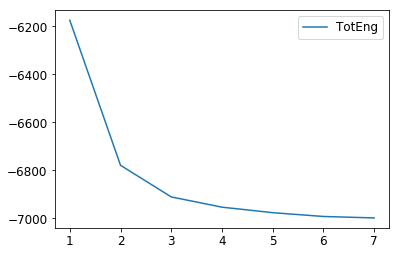

In [36]:
minimization_thermo_pd[["TotEng"]][1:].plot() # units?

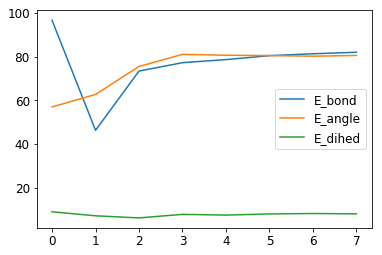

In [40]:
# intramolecular energy contributions
minimization_thermo_pd[["E_bond","E_angle","E_dihed"]].plot() # units?

In [ ]:
# total intramolecular ("bonded") interactions:
minimization_thermo_pd["E_intramolecular"] = minimization_thermo_pd[["E_bond","E_angle","E_dihed"]].sum(axis=1)

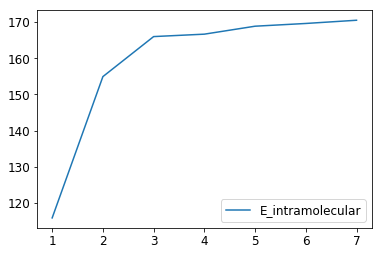

In [72]:
minimization_thermo_pd[["E_intramolecular"]][1:].plot()

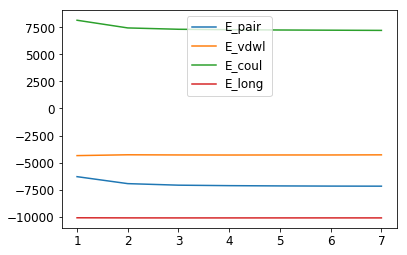

In [94]:
# intermolecular ("non-bonded") energy contribtutions
minimization_thermo_pd[["E_pair","E_vdwl","E_coul","E_long"]][1:].plot() # units?

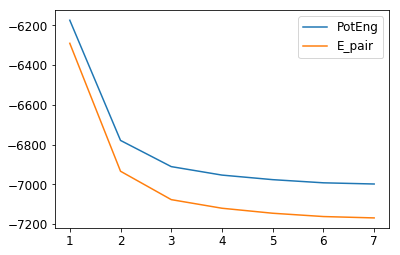

In [73]:
# The total energy decreases, but intramolecular energy increases during minimization:
minimization_thermo_pd[["PotEng","E_pair"]][1:].plot()

In [77]:
# double-check: total potential energy of system minus non-bonded energy (LJ & Coulomb) 
# should correspond to intramolecular energy:
intramolecularEnergyValidation = minimization_thermo_pd["PotEng"] - minimization_thermo_pd["E_pair"]

In [84]:
intramolecularEnergyValidationDiff = (intramolecularEnergyValidation - minimization_thermo_pd["E_intramolecular"])


In [85]:
intramolecularEnergyValidationDiff

0    7.506369
1   -0.000029
2   -0.000043
3   -0.000006
4   -0.000076
5   -0.000011
6    0.000009
7    0.000037
dtype: float64

In [90]:
intramolecularEnergyValidationDiff.abs().max() / intramolecularEnergyValidation.min()

0.064755127920889291

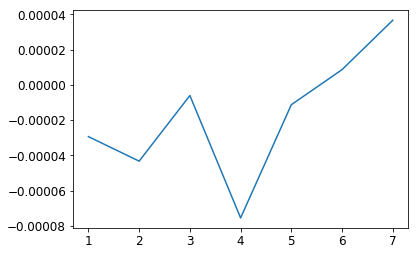

In [91]:
(intramolecularEnergyValidation - minimization_thermo_pd["E_intramolecular"])[1:].plot()
# obviously "equal" (up to a tiny fraction)

### NVT equilibration

In [96]:
nvtEquilibration_thermo_file = absolute_prefix + os.sep + '03_nvtEquilibration_thermo.out'

In [97]:
nvtEquilibration_thermo_pd = pd.read_csv(nvtEquilibration_thermo_file,delim_whitespace=True)

In [98]:
nvtEquilibration_thermo_pd

,Step,TotEng,KinEng,PotEng,Temp,Press,Enthalpy,E_bond,E_angle,E_dihed,E_impro,E_pair,E_vdwl,E_coul,E_long,E_tail,Volume
0,0,-6803.8228,338.90484,-7142.7276,217.11436,-4998.68540,-7433.2721,0.253448,18.014864,7.914223,0,-7168.9102,-4277.7556,7205.4659,-10096.620,0,8634.3385
1,100,-5875.3385,535.12178,-6410.4603,342.81782,3952.66880,-5377.6067,4.516396,37.278154,10.283340,0,-6462.5382,-4258.6376,7889.0230,-10092.924,0,8634.3385
2,200,-5354.9296,634.80273,-5989.7323,406.67695,-1610.65060,-5557.7475,5.803592,46.154437,16.338412,0,-6058.0287,-4224.1003,8259.2700,-10093.198,0,8634.3385
3,300,-6114.4031,292.17674,-6406.5799,187.17869,-11250.38600,-7531.0852,2.497405,25.705319,9.921596,0,-6444.7042,-4375.1611,8027.7486,-10097.292,0,8634.3385
4,400,-5930.7117,444.39995,-6375.1117,284.69823,692.34880,-5843.5291,2.186952,33.025079,9.461111,0,-6419.7848,-4309.2732,7984.6184,-10095.130,0,8634.3385
5,500,-5600.8247,573.14032,-6173.9650,367.17384,5471.14240,-4911.8822,3.742503,30.690370,7.647993,0,-6216.0459,-4315.3014,8191.5371,-10092.282,0,8634.3385
6,600,-5917.5319,406.45192,-6323.9838,260.38739,-5006.23130,-6547.9314,4.598685,32.590409,7.575581,0,-6368.7485,-4301.2619,8025.6528,-10093.139,0,8634.3385
7,700,-5924.9558,434.29381,-6359.2496,278.22388,-5691.66140,-6641.6667,4.586099,32.506513,8.186974,0,-6404.5292,-4323.5026,8012.7695,-10093.796,0,8634.3385
8,800,-5751.6303,525.82107,-6277.4514,336.85947,171.61429,-5730.0201,2.767400,34.660578,7.548189,0,-6322.4275,-4311.4320,8083.0870,-10094.083,0,8634.3385
9,900,-5860.9504,449.66307,-6310.6135,288.06997,-687.14766,-5947.4781,2.228478,32.196152,8.596476,0,-6353.6346,-4307.4029,8049.0234,-10095.255,0,8634.3385


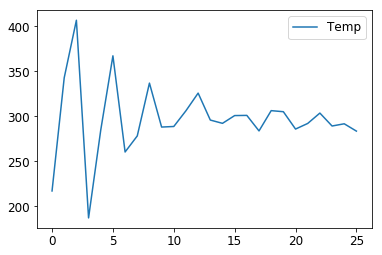

In [111]:
nvtEquilibration_thermo_pd[["Temp"]].plot() # taimed temperature

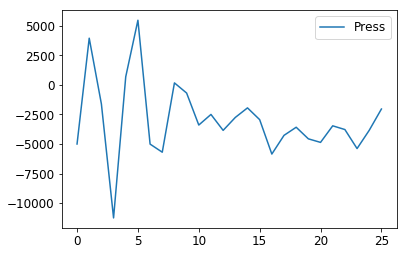

In [112]:
nvtEquilibration_thermo_pd[["Press"]].plot() # wild pressure

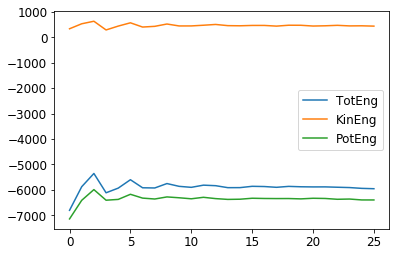

In [100]:
nvtEquilibration_thermo_pd[["TotEng","KinEng","PotEng"]].plot()

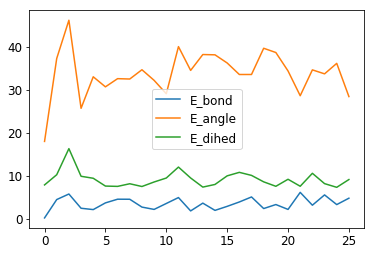

In [103]:
# intramolecular energy contributions
nvtEquilibration_thermo_pd[["E_bond","E_angle","E_dihed"]].plot() 

In [104]:
# total intramolecular ("bonded") interactions:
nvtEquilibration_thermo_pd["E_intramolecular"] = nvtEquilibration_thermo_pd[["E_bond","E_angle","E_dihed"]].sum(axis=1)

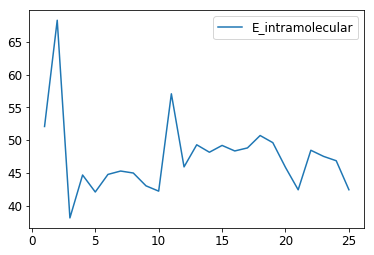

In [105]:
nvtEquilibration_thermo_pd[["E_intramolecular"]][1:].plot()

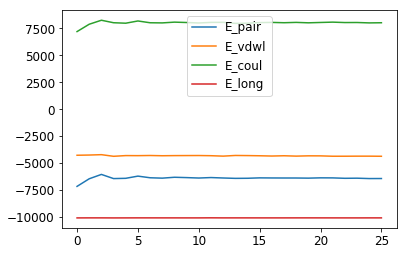

In [106]:
# intermolecular ("non-bonded") energy contribtutions
nvtEquilibration_thermo_pd[["E_pair","E_vdwl","E_coul","E_long"]].plot() # units?

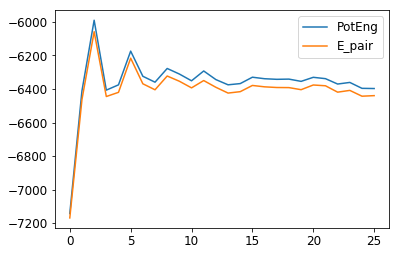

In [108]:
# The total energy decreases, but intramolecular energy increases during minimization:
nvtEquilibration_thermo_pd[["PotEng","E_pair"]].plot()

## NPT equilibration

In [115]:
nptEquilibration_thermo_file = absolute_prefix + os.sep + '04_nptEquilibration_thermo.out'

In [116]:
nptEquilibration_thermo_pd = pd.read_csv(nptEquilibration_thermo_file,delim_whitespace=True)

In [117]:
nptEquilibration_thermo_pd

,Step,TotEng,KinEng,PotEng,Temp,Press,Enthalpy,E_bond,E_angle,E_dihed,E_impro,E_pair,E_vdwl,E_coul,E_long,E_tail,Volume
0,2500,-5866.9905,472.79897,-6339.7895,302.89164,-4032.913500,-6374.8269,2.213302,41.599410,11.603569,0,-6395.2057,-4368.1568,8069.0926,-10096.142,0,8634.3385
1,2600,-5914.2140,460.78947,-6375.0035,295.19793,-513.582430,-5976.6353,2.939291,42.390468,9.147460,0,-6429.4807,-4358.4022,8023.4244,-10094.503,0,8333.8703
2,2700,-5934.2760,469.17905,-6403.4551,300.57259,440.669290,-5881.5761,1.862858,36.035431,8.068397,0,-6449.4218,-4344.1189,7990.0343,-10095.337,0,8200.1518
3,2800,-5918.5780,475.18468,-6393.7627,304.42001,135.451580,-5902.5377,1.125706,34.270673,8.094198,0,-6437.2532,-4383.3701,8040.9294,-10094.813,0,8119.9201
4,2900,-5921.7576,461.84729,-6383.6049,295.87561,1236.613600,-5776.1162,4.389138,34.637560,8.931987,0,-6431.5635,-4370.4028,8033.0869,-10094.248,0,8075.5998
5,3000,-5916.8816,484.96747,-6401.8491,310.68721,-1207.740500,-6060.9837,2.037102,32.820096,12.858556,0,-6449.5649,-4371.4305,8016.7146,-10094.849,0,8181.2685
6,3100,-5953.0101,454.13229,-6407.1424,290.93311,284.218380,-5919.4402,3.173006,28.626992,12.412661,0,-6451.3550,-4366.5979,8009.5860,-10094.343,0,8098.8208
7,3200,-5905.5612,475.11499,-6380.6762,304.37537,639.768270,-5829.3769,3.834768,37.686872,12.192644,0,-6434.3905,-4343.8642,8004.7237,-10095.250,0,8165.2082
8,3300,-5894.8332,474.06082,-6368.8941,303.70002,-2057.509700,-6142.9652,5.579127,37.573329,9.921834,0,-6421.9684,-4376.9314,8049.1503,-10094.187,0,8269.2281
9,3400,-5936.7802,457.93160,-6394.7118,293.36709,672.000600,-5856.9730,3.060026,34.846063,11.972179,0,-6444.5900,-4389.9765,8040.6479,-10095.261,0,8143.2278


In [122]:
equilibration_pd = pd.concat([nvtEquilibration_thermo_pd,nptEquilibration_thermo_pd])

In [125]:
equilibration_pd.set_index("Step",inplace=True)

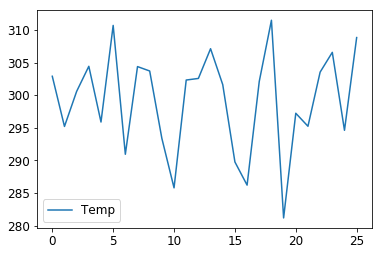

In [118]:
nptEquilibration_thermo_pd[["Temp"]].plot() # taimed temperature

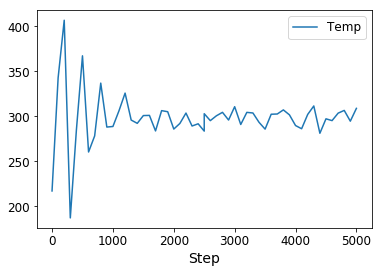

In [127]:
equilibration_pd[["Temp"]].plot()

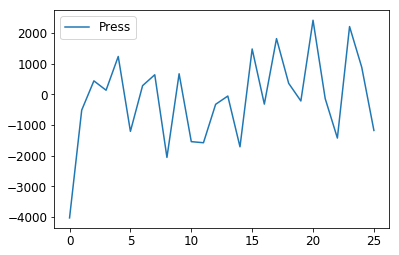

In [119]:
nptEquilibration_thermo_pd[["Press"]].plot() # wild pressure

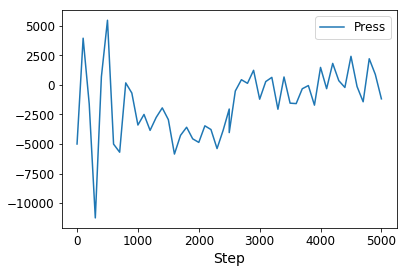

In [128]:
equilibration_pd[["Press"]].plot()

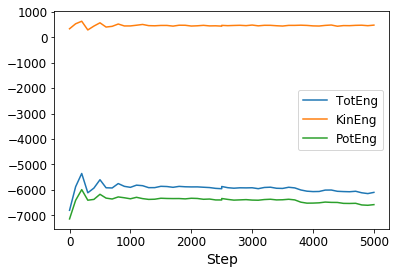

In [130]:
equilibration_pd[["TotEng","KinEng","PotEng"]].plot()

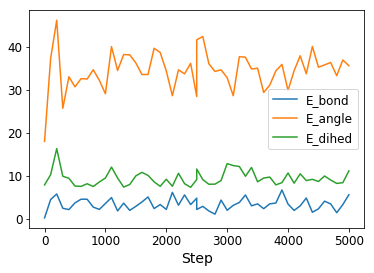

In [131]:
# intramolecular energy contributions
equilibration_pd[["E_bond","E_angle","E_dihed"]].plot() 

In [133]:
# total intramolecular ("bonded") interactions:
equilibration_pd["E_intramolecular"] = equilibration_pd[["E_bond","E_angle","E_dihed"]].sum(axis=1)

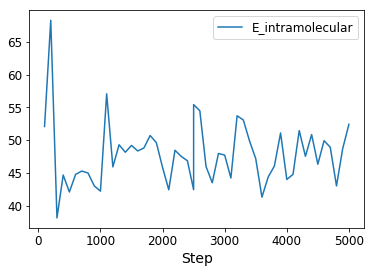

In [134]:
equilibration_pd[["E_intramolecular"]][1:].plot()

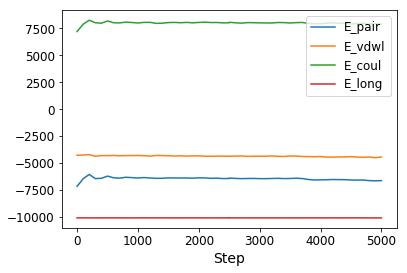

In [135]:
# intermolecular ("non-bonded") energy contribtutions
equilibration_pd[["E_pair","E_vdwl","E_coul","E_long"]].plot() # units?

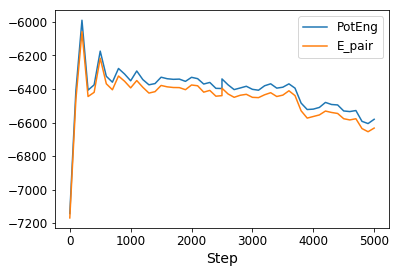

In [136]:
# The total energy decreases, but intramolecular energy increases during minimization:
equilibration_pd[["PotEng","E_pair"]].plot()

In [17]:
diffusivities_10ps_file = absolute_prefix + os.sep + '1_SDS_on_AU_100_2x4x4_charmmfsw_long_10_12_10ps_diffusivities.out'

In [18]:
# For lammps 'fix ave/time' output, the 1st line is just a comment and must be skipped
# 2nd line contains '#' character and the column names
# thus read column names and data separately, removing leading '#' for header
header = pd.read_csv(diffusivities_10ps_file,
            sep=' ',skiprows=1,header='infer', nrows=0)

In [21]:
diffusivities_pd = pd.read_csv(diffusivities_10ps_file,
            sep=' ',skiprows=2,header=None, names=header.columns[1:])

In [114]:
len(diffusivities_pd)

501

In [22]:
diffusivities_pd.iloc[[0]] = 0 # set initial values to zero

In [255]:
diffusivities_pd.columns # names iof columns

Index(['TimeStep', 'v_Dtwopoint', 'v_DmolTwopoint', 'v_DxMolTwopoint',
       'v_DyMolTwopoint', 'v_DzMolTwopoint', 'v_Dfitslope', 'v_DmolFitslope',
       'v_DxMolFitslope', 'v_DyMolFitslope', 'v_DzMolFitslope', 'v_Dvacf',
       'v_Dxvacf', 'v_Dyvacf', 'v_Dzvacf'],
      dtype='object')

In [289]:
tt = dt*diffusivities_pd['TimeStep'].values # real time

In [25]:
diffusivities_pd.index = tt # use real time as index

In [26]:
diffusivities_pd

,TimeStep,v_Dtwopoint,v_DmolTwopoint,v_DxMolTwopoint,v_DyMolTwopoint,v_DzMolTwopoint,v_Dfitslope,v_DmolFitslope,v_DxMolFitslope,v_DyMolFitslope,v_DzMolFitslope,v_Dvacf,v_Dxvacf,v_Dyvacf,v_Dzvacf
0.000000e+00,0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
2.000000e-14,10,0.000144,0.000016,4.558920e-05,8.746840e-07,8.147850e-07,0.000201,0.000009,0.000026,3.987990e-07,3.235550e-07,-0.000048,-0.000141,4.308870e-05,-0.000046
4.000000e-14,20,0.000237,0.000036,1.027730e-04,3.919860e-06,2.589580e-06,0.000186,0.000022,0.000064,1.959700e-06,1.496560e-06,0.000021,0.000066,-4.042640e-05,0.000036
6.000000e-14,30,0.000246,0.000050,1.438720e-04,4.347390e-06,1.415060e-06,0.000215,0.000034,0.000097,3.275240e-06,1.807130e-06,-0.000033,-0.000004,-4.906000e-05,-0.000047
8.000000e-14,40,0.000274,0.000058,1.708500e-04,1.691820e-06,1.163250e-07,0.000235,0.000042,0.000123,3.136510e-06,1.271870e-06,0.000013,0.000220,-5.509600e-05,-0.000127
1.000000e-13,50,0.000273,0.000062,1.867950e-04,3.091640e-09,6.353790e-09,0.000244,0.000049,0.000143,2.198550e-06,8.305840e-07,0.000115,0.000192,-3.421990e-06,0.000156
1.200000e-13,60,0.000275,0.000067,1.975840e-04,2.976170e-06,1.559020e-08,0.000254,0.000053,0.000157,1.886520e-06,5.852820e-07,-0.000021,0.000181,-1.080570e-04,-0.000136
1.400000e-13,70,0.000255,0.000071,1.998590e-04,1.368510e-05,2.408610e-07,0.000256,0.000057,0.000168,3.540520e-06,4.549150e-07,-0.000053,-0.000019,-4.617340e-07,-0.000138
1.600000e-13,80,0.000271,0.000074,1.912710e-04,3.005400e-05,1.805050e-06,0.000258,0.000061,0.000174,7.905820e-06,5.724410e-07,-0.000221,-0.000313,-2.725150e-04,-0.000076
1.800000e-13,90,0.000244,0.000077,1.777710e-04,4.809970e-05,5.125690e-06,0.000257,0.000064,0.000176,1.448660e-05,1.176450e-06,-0.000096,-0.000178,-2.324850e-04,0.000121


In [290]:
def extractDiffusivities(file, dt=2e-15):
    """Expects a LAMMPS 'fix ave/out' text file with first line a comment, 
    second line a header with the first character a '#' followed by column names 
    and all data whitespace-separated from the third line on. Following columns
    are expected:
        'TimeStep', 'v_Dtwopoint', 'v_DmolTwopoint', 'v_DxMolTwopoint',
        'v_DyMolTwopoint', 'v_DzMolTwopoint', 'v_Dfitslope', 'v_DmolFitslope',
        'v_DxMolFitslope', 'v_DyMolFitslope', 'v_DzMolFitslope', 'v_Dvacf',
        'v_Dxvacf', 'v_Dyvacf', 'v_Dzvacf'
    
    Args:
        file (str)   : File name
        dt   (float) : Time step"""
    # For lammps 'fix ave/time' output, the 1st line is just a comment and must be skipped
    # 2nd line contains '#' character and the column names
    # thus read column names and data separately, removing leading '#' for header
    header = pd.read_csv(file, sep=' ',skiprows=1,header='infer', nrows=0)
    diffusivities_pd = pd.read_csv(file, sep=' ',skiprows=2,header=None, names=header.columns[1:])
    diffusivities_pd.iloc[[0]] = 0 # set initial values to zero

    tt = dt*diffusivities_pd['TimeStep'].values
    diffusivities_pd.index = tt
    
    twoPointDiffusivities_keys = ['v_Dtwopoint','v_DmolTwopoint',
                                  'v_DxMolTwopoint', 'v_DyMolTwopoint', 'v_DzMolTwopoint']
    fittedDiffusivities_keys = ['v_Dfitslope',
                                'v_DmolFitslope','v_DxMolFitslope', 'v_DyMolFitslope', 'v_DzMolFitslope']
    vacfDiffusivities_keys = ['v_Dvacf', 'v_Dxvacf', 'v_Dyvacf', 'v_Dzvacf']
    
    twoPointDiffusivities_pd = diffusivities_pd[twoPointDiffusivities_keys]
    fittedDiffusivities_pd = diffusivities_pd[fittedDiffusivities_keys]
    vacfDiffusivities_pd = diffusivities_pd[vacfDiffusivities_keys]
    # I think the VACF diffusivites calculated on the fly are a mess
    
    return (diffusivities_pd, twoPointDiffusivities_pd, fittedDiffusivities_pd, vacfDiffusivities_pd)

In [291]:
diffusivities_10ps_file = absolute_prefix + os.sep + '1_SDS_on_AU_100_2x4x4_charmmfsw_long_10_12_10ps_diffusivities.out'

In [292]:
diffusivities_1ns_file = absolute_prefix + os.sep + '1_SDS_on_AU_100_2x4x4_charmmfsw_long_10_12_1ns_diffusivities.out'

In [293]:
diffusivities_10ps_pd, diffusivities_10ps_twopoint_pd, diffusivities_10ps_fitslope_pd, diffusivities_10ps_vacf_pd \
    = extractDiffusivities(diffusivities_10ps_file)

In [294]:
diffusivities_1ns_pd, diffusivities_1ns_twopoint_pd, diffusivities_1ns_fitslope_pd, diffusivities_1ns_vacf_pd \
    = extractDiffusivities(diffusivities_1ns_file)

In [295]:
diffusivities_10ps_pd.name = 'Initital 10 ps'

In [296]:
len(diffusivities_1ns_pd)

50001

In [297]:
idx = diffusivities_1ns_pd.index

In [298]:
T = (idx.max() - idx.min())

In [299]:
T # total duration, 1ns

1.0000000000000001e-09

In [301]:
last_10ps_idx = idx > T - 10e-12 # select the last 10 ps

In [303]:
np.count_nonzero(last_10ps_idx) # how many entries for last 10 ps=

500

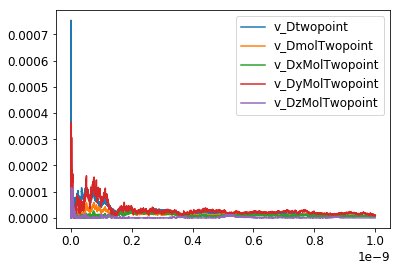

In [304]:
diffusivities_1ns_twopoint_pd.plot()

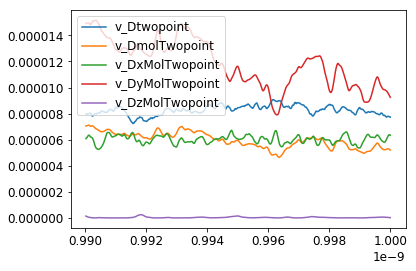

In [305]:
diffusivities_1ns_twopoint_pd[last_10ps_idx].plot()

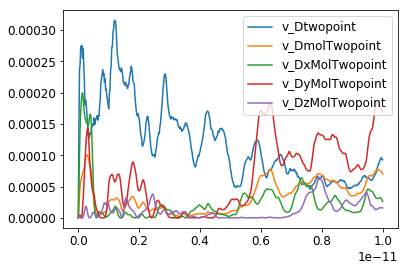

In [306]:
diffusivities_10ps_twopoint_pd.plot()

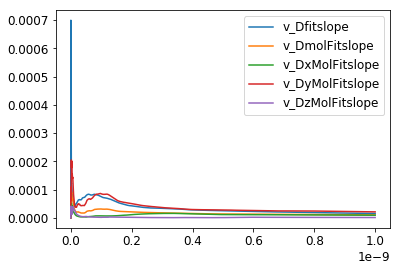

In [307]:
diffusivities_1ns_fitslope_pd.plot()

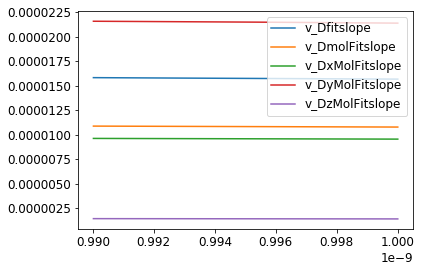

In [308]:
diffusivities_1ns_fitslope_pd[last_10ps_idx].plot()

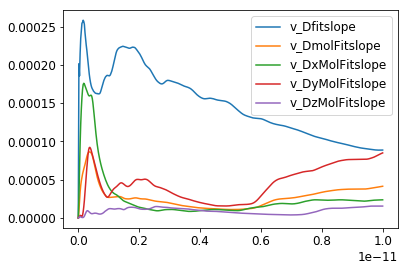

In [309]:
diffusivities_10ps_fitslope_pd.plot()

In [ ]:
# LAMMPS units:
# units          real
# http://lammps.sandia.gov/doc/units.html
    #mass = grams/mole
    #distance = Angstroms
    #time = femtoseconds
    #energy = Kcal/mole
    #velocity = Angstroms/femtosecond
    #force = Kcal/mole-Angstrom, compared to gmx: kJ mol^-1 nm^-1,
        # conversion F_lmp = F_gmx * 0.1 [nm/Ang] / 4.184 [kJ/kcal] ~ gmx / 41.81
        # 1000 kJ / (mol*nm) ~ 25 kCal/(mol*Ang)
    #torque = Kcal/mole
    #temperature = Kelvin
    #pressure = atmospheres, 1 atm = 1013 hPa ~ 100 kPa
    #dynamic viscosity = Poise
    #charge = multiple of electron charge (1.0 is a proton)
    #dipole = charge*Angstroms
    #electric field = volts/Angstrom
    #density = gram/cm^dim
    
# [ MSD ] = distance^2         = Ang^2
# [ D ]   = distance^2 / time  = Ang^2 / fs = 1e-20 m / 1e-15 s = 1e-5 m / s

In [225]:
conversion_D_lmp_to_SI = 1e-5

In [283]:
def plotDiffusivitiesFromDf(dfs, keys):
    """Plots data frames with diffusivity labeling
    
    Args:
        dfs  : list of pandas.DataFrame
        keys : list of list of str
    """
    width = 8
    height = 5
    cols = 2
    rows = int(np.ceil(len(keys) / cols))
    fig, axes = plt.subplots(rows, cols,figsize=(cols*width,rows*height))

    print("Create {:d}x{:d} subplots.".format(rows,cols))
    #j = 0
    for n, (key, df) in enumerate(zip(keys,dfs)):
        if rows > 1:
            ij = ( int(n/cols),n%cols)
        else:
            ij = n
        print(ij,key)
        axes[ij].plot(df.index, df[key] * conversion_D_lmp_to_SI, label="dummy")
        handles, labels = axes[ij].get_legend_handles_labels()
        axes[ij].legend(handles,key)
        axes[ij].set_xlabel(r'$\frac{t}{s}$')
        axes[ij].set_ylabel(r'$\frac{D}{m^2 s^{-1}}$')
        if hasattr(df, 'name'):
            axes[ij].set_title(df.name)
            
    return fig

In [324]:
keys = [['v_Dtwopoint','v_DmolTwopoint'],
        ['v_Dfitslope','v_DmolFitslope'],
        ['v_Dtwopoint','v_DmolTwopoint'],
        ['v_Dfitslope','v_DmolFitslope']]

dfs = [ diffusivities_10ps_pd, 
        diffusivities_10ps_pd,
        diffusivities_1ns_pd[last_10ps_idx],
        diffusivities_1ns_pd[last_10ps_idx] ]

Create 2x2 subplots.
(0, 0) ['v_Dtwopoint', 'v_DmolTwopoint']
(0, 1) ['v_Dfitslope', 'v_DmolFitslope']
(1, 0) ['v_Dtwopoint', 'v_DmolTwopoint']
(1, 1) ['v_Dfitslope', 'v_DmolFitslope']


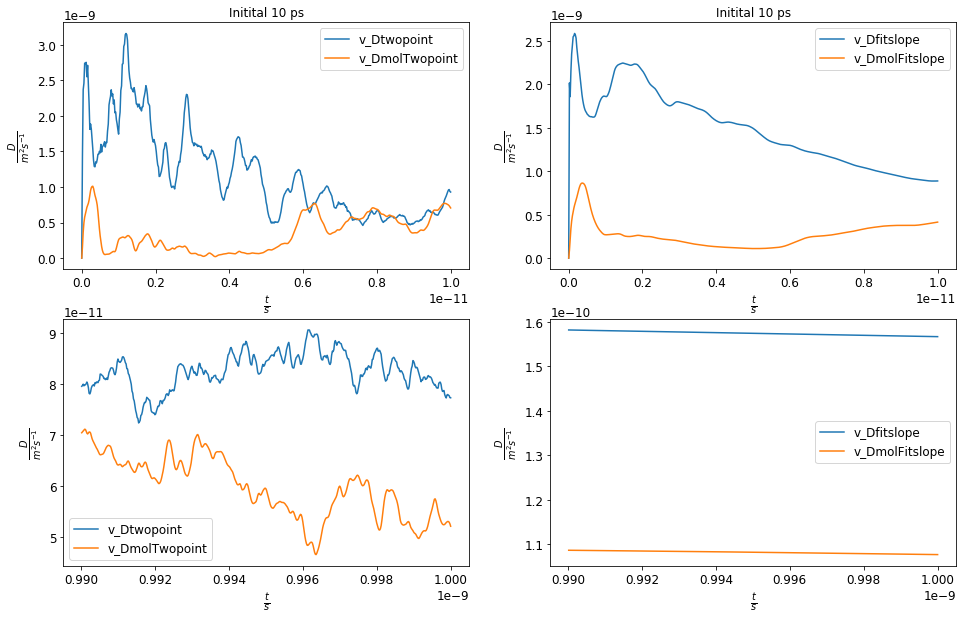

In [314]:
_ = plotDiffusivitiesFromDf(dfs,keys) # suppress double output

In [325]:
keys[0:2]

[['v_Dtwopoint', 'v_DmolTwopoint'], ['v_Dfitslope', 'v_DmolFitslope']]

In [326]:
key

['v_Dfitslope', 'v_DmolFitslope']

Create 1x2 subplots.
0 ['v_Dtwopoint', 'v_DmolTwopoint']
1 ['v_Dfitslope', 'v_DmolFitslope']


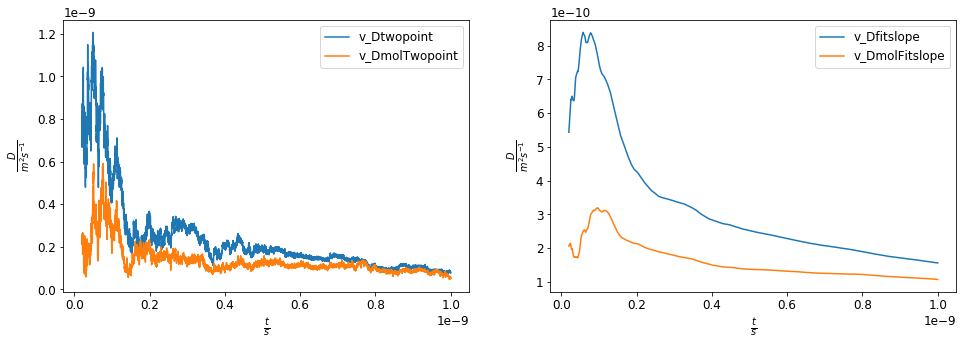

In [327]:
_ = plotDiffusivitiesFromDf([diffusivities_1ns_pd.iloc[1000:],diffusivities_1ns_pd.iloc[1000:]], keys[0:2])

In [329]:
keys = [['v_Dtwopoint','v_DmolTwopoint', 'v_DxMolTwopoint', 'v_DyMolTwopoint', 'v_DzMolTwopoint'],
        ['v_Dfitslope','v_DmolFitslope', 'v_DxMolFitslope', 'v_DyMolFitslope', 'v_DzMolFitslope'],
        ['v_Dtwopoint','v_DmolTwopoint', 'v_DxMolTwopoint', 'v_DyMolTwopoint', 'v_DzMolTwopoint'],
        ['v_Dfitslope','v_DmolFitslope', 'v_DxMolFitslope', 'v_DyMolFitslope', 'v_DzMolFitslope'],]

dfs = [ diffusivities_10ps_pd, 
        diffusivities_10ps_pd,
        diffusivities_1ns_pd[last_10ps_idx],
        diffusivities_1ns_pd[last_10ps_idx] ]

Create 2x2 subplots.
(0, 0) ['v_Dtwopoint', 'v_DmolTwopoint', 'v_DxMolTwopoint', 'v_DyMolTwopoint', 'v_DzMolTwopoint']
(0, 1) ['v_Dfitslope', 'v_DmolFitslope', 'v_DxMolFitslope', 'v_DyMolFitslope', 'v_DzMolFitslope']
(1, 0) ['v_Dtwopoint', 'v_DmolTwopoint', 'v_DxMolTwopoint', 'v_DyMolTwopoint', 'v_DzMolTwopoint']
(1, 1) ['v_Dfitslope', 'v_DmolFitslope', 'v_DxMolFitslope', 'v_DyMolFitslope', 'v_DzMolFitslope']


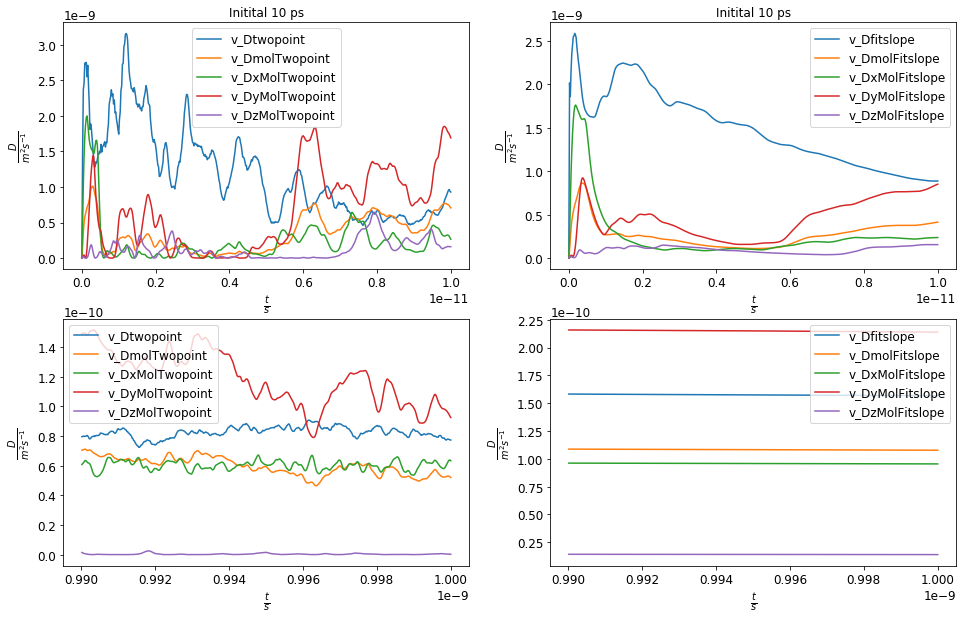

In [330]:
_ = plotDiffusivitiesFromDf(dfs,keys) # suppress double output

The anisotropic diffusivities do not look right. I expected y & z to be isotropic, but x (normal to surface) to be lower

## netCDF trajectory visualization with ASE and ParmEd

In [415]:
pdb_file_initial_config = absolute_prefix + os.sep + '1_SDS_on_AU_100_2x4x4_psfgen_ctrl_tidy.pdb'
lmp_file_initial_config = absolute_prefix + os.sep + '1_SDS_on_AU_100_2x4x4_psfgen.data'

traj_file_10ps = absolute_prefix + os.sep + '1_SDS_on_AU_100_2x4x4_charmmfsw_long_10_12_10ps_nveProduction.nc'
traj_file_1ns = absolute_prefix + os.sep + '1_SDS_on_AU_100_2x4x4_charmmfsw_long_10_12_1ns_nveProduction.nc'

In [359]:
# ASE by default infers elements from LAMMPS atom types, in our case they are unrelated
# During preprocessing, our system went through several formats, one of them the 
# archaic .pdb format. Although ASE offers a pdb reader, it fails on our system.

# On the other hand, ParmEd is able to read .pdb and infer elements more or less accurately,
# but cannot process netCDF. Thus we combine both:
struct_pdb_pmd = pmd.read_PDB(pdb_file_initial_config)

In [360]:
resnames = np.unique([r.name for r in struct_pdb_pmd.residues])

In [361]:
resnames # residues in system

array(['AUM', 'HOH', 'ION', 'SDS'],
      dtype='<U3')

In [443]:
water = [ a for a in struct_pdb_pmd.atoms if a.residue.name == 'HOH' ] # water

In [454]:
water_indices = [ a.number - 1 for a in water ] # to remove water atoms later

In [493]:
surface = [ a for a in struct_pdb_pmd.atoms if a.residue.name == 'AUM' ] # gold surface

In [494]:
surface_indices = [ a.number - 1 for a in surface ] 

In [501]:
surface_indices[0] # double check index begins at 0

0

In [495]:
surfactant = [ a for a in struct_pdb_pmd.atoms if a.residue.name == 'SDS' ]

In [496]:
surfactant_indices = [ a.number - 1 for a in surfactant ] 

In [498]:
len(surfactant_indices)

42

In [362]:
ions = [ a for a in struct_pdb_pmd.atoms if a.residue.name == 'ION' ] # sodium counterions

In [363]:
ions

[<Atom SOD [569]; In ION 262>]

In [364]:
ions[0].atomic_number # wrong: inferred S (sulfur)

16

In [365]:
ions[0].atomic_number = 11 # small sodium correction: apparently, SOD and S are both interpreted as sulfur

In [502]:
nv.show_parmed(struct_pdb_pmd)

NGLWidget()

In [367]:
atomic_numbers = np.array([ a.atomic_number for a in struct_pdb_pmd.atoms ]) # elements numbered as in periodic table

In [369]:
struct = read(lmp_file_initial_config,format='lammps-data')

In [370]:
atomic_types = struct.get_atomic_numbers() # types as numbered in LAMMPS

In [371]:
types2numbers = dict(zip(atomic_types,atomic_numbers)) # automatically picks unique tuples

In [372]:
types2numbers

{1: 1, 2: 1, 3: 6, 4: 6, 5: 8, 6: 8, 7: 16, 8: 79, 9: 1, 10: 8, 12: 11}

In [373]:
struct.set_atomic_numbers(atomic_numbers) # set ASE element numbers correctly

In [374]:
struct.center() # put system in box

In [375]:
view(struct,viewer='ngl')

HBox(children=(NGLWidget(), VBox(children=(Dropdown(description='Show', options=('All', 'C', 'O', 'S', 'Au', 'H', 'Na'), value='All'), FloatSlider(value=0.8, description='Ball size', max=1.5, step=0.01)))))

In [376]:
len(types2numbers)

11

In [377]:
types2numbers.items()

dict_items([(8, 79), (7, 16), (5, 8), (6, 8), (3, 6), (1, 1), (4, 6), (2, 1), (10, 8), (9, 1), (12, 11)])

In [378]:
np.unique(atomic_types)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12])

In [379]:
atomic_types.max()

12

In [380]:
len(types2numbers)

11

In [416]:
# construct array, where indices represent LAMMPS type numbers and point to atomic numbers

In [417]:
types2numbers_array = np.zeros(atomic_types.max()+1,dtype=np.uint)

In [418]:
for k,v in types2numbers.items():
    types2numbers_array[k] = v

In [419]:
types2numbers_array 

array([ 0,  1,  1,  6,  6,  8,  8, 16, 79,  1,  8,  0, 11], dtype=uint64)

In [420]:
len(types2numbers_array)

13

In [421]:
types2numbers_array[atomic_types]

array([79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 16,  8,  8,  8,  8,  6,  1,  1,
        6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,
        1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  1,
        8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,
        1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,
        1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,
        8,  1,  1,  8,  1

In [422]:
list(types2numbers_array)

[0, 1, 1, 6, 6, 8, 8, 16, 79, 1, 8, 0, 11]

In [423]:
traj = NetCDFTrajectory(traj_file_10ps, 'r',
                        types_to_numbers=list(types2numbers_array),
                        keep_open=True)
# workaround to center trajecory in box
# (ASE places the box origin at 0,0,0 by default)
frames = []
for i,frame in enumerate(traj):
    frame.center() 
    frames.append( frame )
traj.close()

In [426]:
view(frame) # view last frame in ASE gui

In [406]:
view(frames) # view whole trajectory in ASE gui

In [342]:
%pwd

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201806/1_SDS_on_AU_100_2x4x4'

In [343]:
traj[0]

Atoms(symbols='C12H387Au128NaO185S', pbc=True, cell=[38.27284789205136, 14.352318250561908, 14.352318250561908], masses=..., mol=..., momenta=...)

In [266]:
%pwd

'/work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201806/1_SDS_on_AU_100_2x4x4'

In [411]:
nv.show_asetraj(frames)

NGLWidget(count=51)

In [413]:
view(frames[0],viewer='ngl')

HBox(children=(NGLWidget(), VBox(children=(Dropdown(description='Show', options=('All', 'C', 'O', 'S', 'Au', 'H', 'Na'), value='All'), FloatSlider(value=0.8, description='Ball size', max=1.5, step=0.01)))))

In [434]:
view(frames,viewer='ngl')

HBox(children=(NGLWidget(count=51), VBox(children=(Dropdown(description='Show', options=('All', 'C', 'O', 'S', 'Au', 'H', 'Na'), value='All'), FloatSlider(value=0.8, description='Ball size', max=1.5, step=0.01), IntSlider(value=0, max=50)))))

In [476]:
traj_1ns = NetCDFTrajectory(traj_file_1ns, 'r',
                        types_to_numbers=list(types2numbers_array),
                        keep_open=True)
# workaround to center trajecory in box
# (ASE places the box origin at 0,0,0 by default)
frames_1ns = []
for i,frame in enumerate(traj_1ns):
    frame.center() 
    frames_1ns.append( frame )
traj_1ns.close()

In [477]:
%memit

peak memory: 814.77 MiB, increment: 0.00 MiB


In [478]:
len(frames_1ns)

5001

In [435]:
view(frames_1ns,viewer='ngl') # does not work on frame array

HBox(children=(NGLWidget(count=5001), VBox(children=(Dropdown(description='Show', options=('All', 'C', 'O', 'S', 'Au', 'H', 'Na'), value='All'), FloatSlider(value=0.8, description='Ball size', max=1.5, step=0.01), IntSlider(value=0, max=5000)))))

In [436]:
view(frames_1ns)

In [440]:
dir(frame[600])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 'a',
 'atoms',
 'b',
 'c',
 'charge',
 'cut_reference_to_atoms',
 'data',
 'delete',
 'get',
 'get_raw',
 'index',
 'magmom',
 'mass',
 'momentum',
 'number',
 'position',
 'scaled_position',
 'set',
 'symbol',
 'tag',
 'x',
 'y',
 'z']

In [458]:
frame[water_indices]

Atoms(symbols='H362O181', pbc=True, cell=[38.27284789205136, 14.352318250561908, 14.352318250561908], masses=..., mol=..., momenta=...)

In [459]:
frames_1ns_stripped = []
for frame in frames_1ns:
    del frame[water_indices] # remove water from trajectory
    frames_1ns_stripped.append(frame)

In [ ]:
view(frames_1ns_stripped)

In [475]:
len(frames_1ns_stripped)

5001

In [479]:
every_nth = 5

In [480]:
len(frames_1ns_stripped[0::every_nth])

1001

In [490]:
cell

array([[ 38.27284789,   0.        ,   0.        ],
       [  0.        ,  14.35231825,   0.        ],
       [  0.        ,   0.        ,  14.35231825]])

In [481]:
png_prefix = absolute_prefix + os.sep + 'png' + os.sep + 'traj_1ns'

In [487]:
# make a movie
# https://wiki.fysik.dtu.dk/ase/development/making_movies.html
for i,f in enumerate(frames_1ns_stripped[0::every_nth]):
    cell = f.get_cell()
    f = f.repeat((1, 2, 1))
    f.set_cell(cell)
    ase.io.write(png_prefix + '_{:05d}.png'.format(i), f, show_unit_cell=True, 
                bbox=[-5, -5, 45, 35])
# bbox measures chosen to exceed cell once in x direction and twice in (repeated) y direction
# externally execute
#    ffmpeg -r 30 -f image2 -i "traj_1ns_%05d.png" -vcodec libx264 -crf 25 -pix_fmt yuv420p "traj_1ns.mp4

In [488]:
# Several problems with nglview:
#  1) does not display or infer bonding for ASE trajectory
#  2) even with displayed gui, not clear how to activate

In [430]:
traj_1ns_nv = nv.ASETrajectory(traj_1ns)

In [431]:
traj_1ns_widget = nv.NGLWidget(traj_1ns_nv)

In [387]:
# traj2_widget.add_ball_and_stick()

In [432]:
traj_1ns_widget

NGLWidget(count=5001)

In [377]:
traj2_view = nv.show_asetraj(traj2)

In [378]:
traj2_view.add_ball_and_stick('not hydrogen')

In [379]:
traj2_view

NGLWidget(count=5001)

In [433]:
nv.show_asetraj(traj_1ns,gui=True)

NGLWidget(count=5001)

Tab(children=(Box(children=(Box(children=(Box(children=(Label(value='step'), IntSlider(value=1, min=-100)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), Box(children=(Label(value='delay'), IntSlider(value=100, max=1000, min=10)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), Box(children=(Label(value='background'), ColorPicker(value='white')), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), Box(children=(Label(value='camera'), Dropdown(options=('perspective', 'orthographic'), value='perspective')), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), Box(children=(Label(value=''), HBox(children=(ToggleButton(value=False, description='Smoothing', tooltip='smoothing trajectory'), Button(description=' Center', icon='bullseye', style=ButtonStyle()), Button(description=' Screenshot', icon='camera', style=ButtonStyle()), Button(description='qtconsole', style=ButtonStyle(), tooltip='pop up qtconsole')), layout=Layout(flex='1 1 auto', width='auto'))), layout=Layout(display='flex', flex_flow='row', justify_content='space-between'))), layout=Layout(align_items='stretch', display='flex', flex_flow='column', width='100%')),)), Box(), Box(), Box(), Box(), Box()), layout=Layout(align_items='stretch', align_self='center'), _titles={'0': 'General', '1': 'Representation', '2': 'Preference', '3': 'Theme', '4': 'Extra', '5': 'Help'})

## MSD in post-processing

In [515]:
N = len(frames_1ns_stripped)-1

In [516]:
N

5000

In [508]:
surfactant_com_ref = frames_1ns_stripped[0][surfactant_indices].get_center_of_mass()

In [509]:
surfactant_com_ref

array([ 21.94608852,   3.34975768,   9.90398152])

In [569]:
frames_1ns_stripped[-1][surfactant_indices].get_center_of_mass()

array([ 18.4388852 ,   8.1263545 ,   6.75849102])

In [511]:
surfactant_com_ref

array([ 21.94608852,   3.34975768,   9.90398152])

In [536]:
surfactant_com_msd = np.zeros((N,3))

In [537]:
for i,f in enumerate(frames_1ns_stripped[1:]):
    surfactant_com_msd[i,:] = (f[surfactant_indices].get_center_of_mass() - surfactant_com_ref)**2

In [538]:
surfactant_com_ref

array([ 21.94608852,   3.34975768,   9.90398152])

In [539]:
surfactant_com_msd.T

array([[  2.98328745e-03,   1.90587383e-02,   3.49474932e-02, ...,
          1.27626765e+01,   1.16559258e+01,   1.23004751e+01],
       [  8.91838907e-02,   1.15346156e-01,   8.20386403e-02, ...,
          2.88147793e+01,   3.12878701e+01,   2.28158772e+01],
       [  1.82144800e-03,   1.01678057e-01,   3.66263257e-02, ...,
          1.15401924e+01,   1.25373240e+01,   9.89411045e+00]])

In [546]:
TT = np.arange(1,N+1)*dt*100

In [547]:
TT

array([  2.00000000e-13,   4.00000000e-13,   6.00000000e-13, ...,
         9.99600000e-10,   9.99800000e-10,   1.00000000e-09])

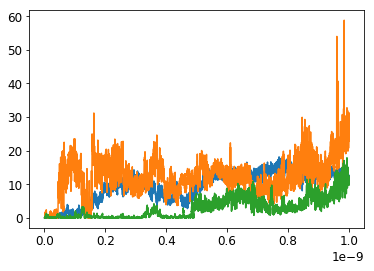

In [548]:
plt.plot(TT,surfactant_com_msd)

In [551]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [553]:
len(running_mean(surfactant_com_msd,10))

14991

In [554]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

In [559]:
len(runningMeanFast(surfactant_com_msd[:,0],10))

5000

In [ ]:
surfa

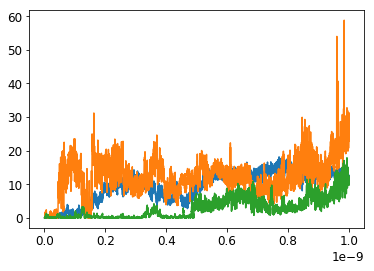

In [563]:
for i in range(3):
    plt.plot(TT,surfactant_com_msd[:,i])

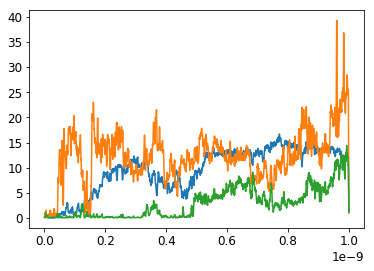

In [565]:
for i in range(3):
    plt.plot(TT,runningMeanFast(surfactant_com_msd[:,i],10))

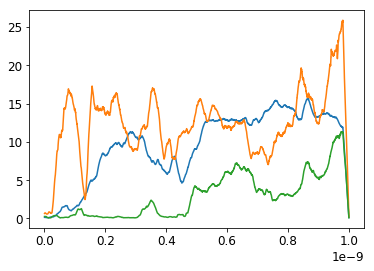

In [566]:
for i in range(3):
    plt.plot(TT,runningMeanFast(surfactant_com_msd[:,i],100))

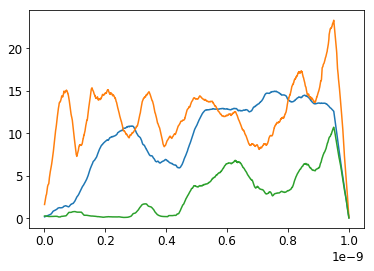

In [571]:
for i in range(3):
    plt.plot(TT,runningMeanFast(surfactant_com_msd[:,i],250))

In [568]:
len(surfactant_com_msd)

5000

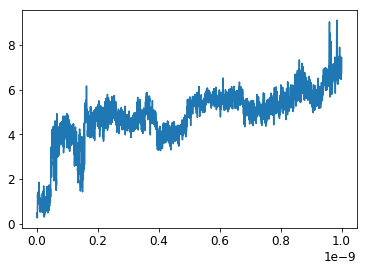

In [574]:
plt.plot(TT,np.sqrt(surfactant_com_msd.sum(axis=1)))

In [580]:
TT

array([  2.00000000e-13,   4.00000000e-13,   6.00000000e-13, ...,
         9.99600000e-10,   9.99800000e-10,   1.00000000e-09])

In [581]:
surfactant_com_Dtwopoint = np.sqrt(surfactant_com_msd.sum(axis=1))/(TT*6)*10e-20

In [582]:
surfactant_com_Dtwopoint

array([  2.55479704e-08,   2.02451533e-08,   1.08870626e-08, ...,
         1.21518366e-10,   1.24167583e-10,   1.11816396e-10])

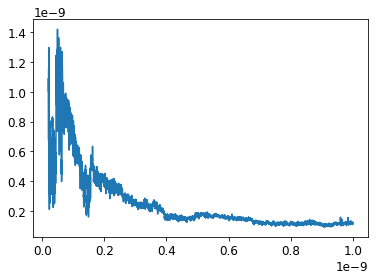

In [584]:
plt.plot(TT[100:],surfactant_com_Dtwopoint[100:])

In [579]:
TT

array([  2.00000000e-13,   4.00000000e-13,   6.00000000e-13, ...,
         9.99600000e-10,   9.99800000e-10,   1.00000000e-09])